In [136]:
#import the libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [137]:
# training data set
train_ccdata = pd.read_csv('CC.csv')

train_ccdata.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [138]:
# drop null values
train_ccdata.loc[(train_ccdata['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=train_ccdata['MINIMUM_PAYMENTS'].mean()
train_ccdata.loc[(train_ccdata['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=train_ccdata['CREDIT_LIMIT'].mean()

In [139]:
nulls = pd.DataFrame(train_ccdata.isnull().sum().sort_values(ascending=False)[:])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

                                  Null Count
Feature                                     
TENURE                                     0
PRC_FULL_PAYMENT                           0
BALANCE                                    0
BALANCE_FREQUENCY                          0
PURCHASES                                  0
ONEOFF_PURCHASES                           0
INSTALLMENTS_PURCHASES                     0
CASH_ADVANCE                               0
PURCHASES_FREQUENCY                        0
ONEOFF_PURCHASES_FREQUENCY                 0
PURCHASES_INSTALLMENTS_FREQUENCY           0
CASH_ADVANCE_FREQUENCY                     0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
CREDIT_LIMIT                               0
PAYMENTS                                   0
MINIMUM_PAYMENTS                           0
CUST_ID                                    0


In [140]:
# Shaping dataset after removed null values
X = train_ccdata.iloc[:,1:-1]
y = train_ccdata.iloc[:,-1]
print(X.shape,y.shape)

(8950, 16) (8950,)


In [146]:
wcss = []  #Within Cluster Sum of Squares

#elbow method to know the number of clusters
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,max_iter=300,random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

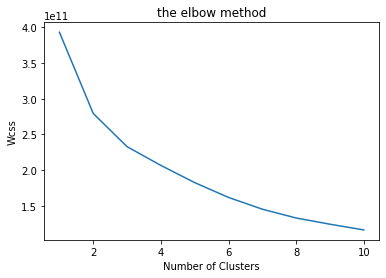

In [147]:
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [149]:
#Calculate the silhouette score for the above clustering.
y_cluster_kmeans= kmeans.predict(X)
score = metrics.silhouette_score(X, y_cluster_kmeans)
print('Silhouette Score: \n',  score)

Silhouette Score: 
 0.360147899376414


In [157]:
#Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If yes, can you justify why.

scaler = StandardScaler()
scaler.fit(X) # Fit on training set only.
x_scaler = scaler.transform(X)
#The number of components parameter (5)
pca = PCA(5)
x_pca = pca.fit_transform(x_scaler) # Fit to data and transform. Notice y is not specified!
dataset2 = pd.DataFrame(data=x_pca)
datasetfinal = pd.concat([dataset2,train_ccdata[['TENURE']]],axis=1)

In [164]:
#Apply PCA on the same dataset.
km = KMeans(n_clusters=3)
km.fit(x_pca)

#Apply K-Means algorithm on the PCA result and report your observation if the silhouette score improved or not?
scorepca = metrics.silhouette_score(x_pca, y_cluster_kmeans)
print('Silhouette Score: \n',  scorepca)

Silhouette Score: 
 0.06548653720549787


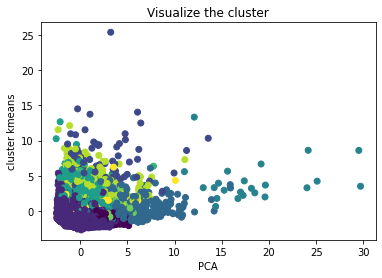

In [171]:
#*** Bonus points : 4. Visualize the clustering of first question.

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_cluster_kmeans)
plt.title('Visualize the cluster')
plt.xlabel('PCA') #Principal Component Analysis
plt.ylabel('cluster kmeans')
plt.show()